# Tem project : 파이썬을 통한 식단관리 프로그램 만들기

## (1) 주제 선정 이유:

> 요즘 헬스를 하면서 자기 관리를 하는 청년들이 늘어나고 있다. 헬스 및 자기 관리에 시간을 지나치게 투자하는 사람들을 일컬어'헬창'이라는 신조어를 만들 정도로 요즘 자기관리를 하는 젊은 청년들이 많아지는 추세다.

>실제로 주변에서 헬스를 하면서 몸관리를 하는 지인이 밥을 먹으면서 단백질 위주로 식단을 관리하는 것을 본 적이 있는데, 대충 단백질 함량이 많은 식품을 먹는 것이 아니라 정확히 본인의 목적에 맞는 단백질 함량을 찾아 식단을 관리하면 편리할 것 같다고 생각하였다.
이렇듯 자기관리를 위해 식단을 고려하는 청년을 위해, 적정 단백질 함량을 계산해줄 뿐만 아니라 전체적인 식단의 영양 성분 비율이 적절한지, 하루에 섭취한 열량이 적절한지 등의 기능을 가지고 있는 전반적인 식단관리 프로그램을 파이썬을 통해 구현해보고자 한다.

## (2) 가설 정의:

식단관리 프로그램을 통해 크게 2가지의 기능을 구현하고자 한다.

> ### (i) 내가 섭취한 식품의 영양 성분 비율 한 눈에 보기
하루동안 섭취한 음식명과 섭취량(g기준)을 입력하면, 나의 하루 영양소 섭취 비율을 원 그래프를 통해 시각화하는 기능을 구현한다.
이때 보건복지부에서 제공하는 적정 영양소 섭취비율의 그래프 또한 같이 제시하여 나의 영양소 섭취 비율과 적정 비율을 비교할 수 있도록 한다.

> ### (ii) 나의 적정 단백질 섭취량 알아보기
헬스를 하는 사람의 경우 영양 성분 중 특히 단백질을 중요하게 생각하기 때문에, 음식의 영양 성분 중 단백질 함량만을 추출하여 제공하고자 한다. 하루동안 섭취한 식품에서 단백질 함량만을 추출하여 나의 총 단백질 섭취량을 계산해주고, 이를 본인에게 맞는 적정 단백질 섭취량과 비교하여 단백질 섭취량이 적절한지 알아보는 기능을 제공한다.

이 프로젝트를 통하여 식단 관리를 하는 청년들이 식품의 영양성분을 따로 찾아보고 계산을 번거롭게 해야하는 불편함을 덜어주고, 영양성분 정보들을 시각화하여 한 눈에 비교할 수 있도록 돕고자 한다. 또, 사용자 목적에 맞게 적절한 식단을 구성함으로써 좀 더 사용자의 개별적 특성을 반영한 식단 관리에 도움을 줄 수 있다. 이를 통해 자기 관리를 열심히 하는 청년들의 식단 관리 편의성을 증진시키고, 목적에 맞는 적절한 식단을 구성할 수 있도록 방향을 수정하는 데에 도움을 줄 수 있다. 

## (3) 인터넷을 통한 데이터 획득

* ### 정부 공공데이터 이용

공공데이터 포털
https://www.data.go.kr/

이용할 데이터는 아래 사진과 같은 전국 통합식품 영양성분 정보(음식) 표준데이터이다.
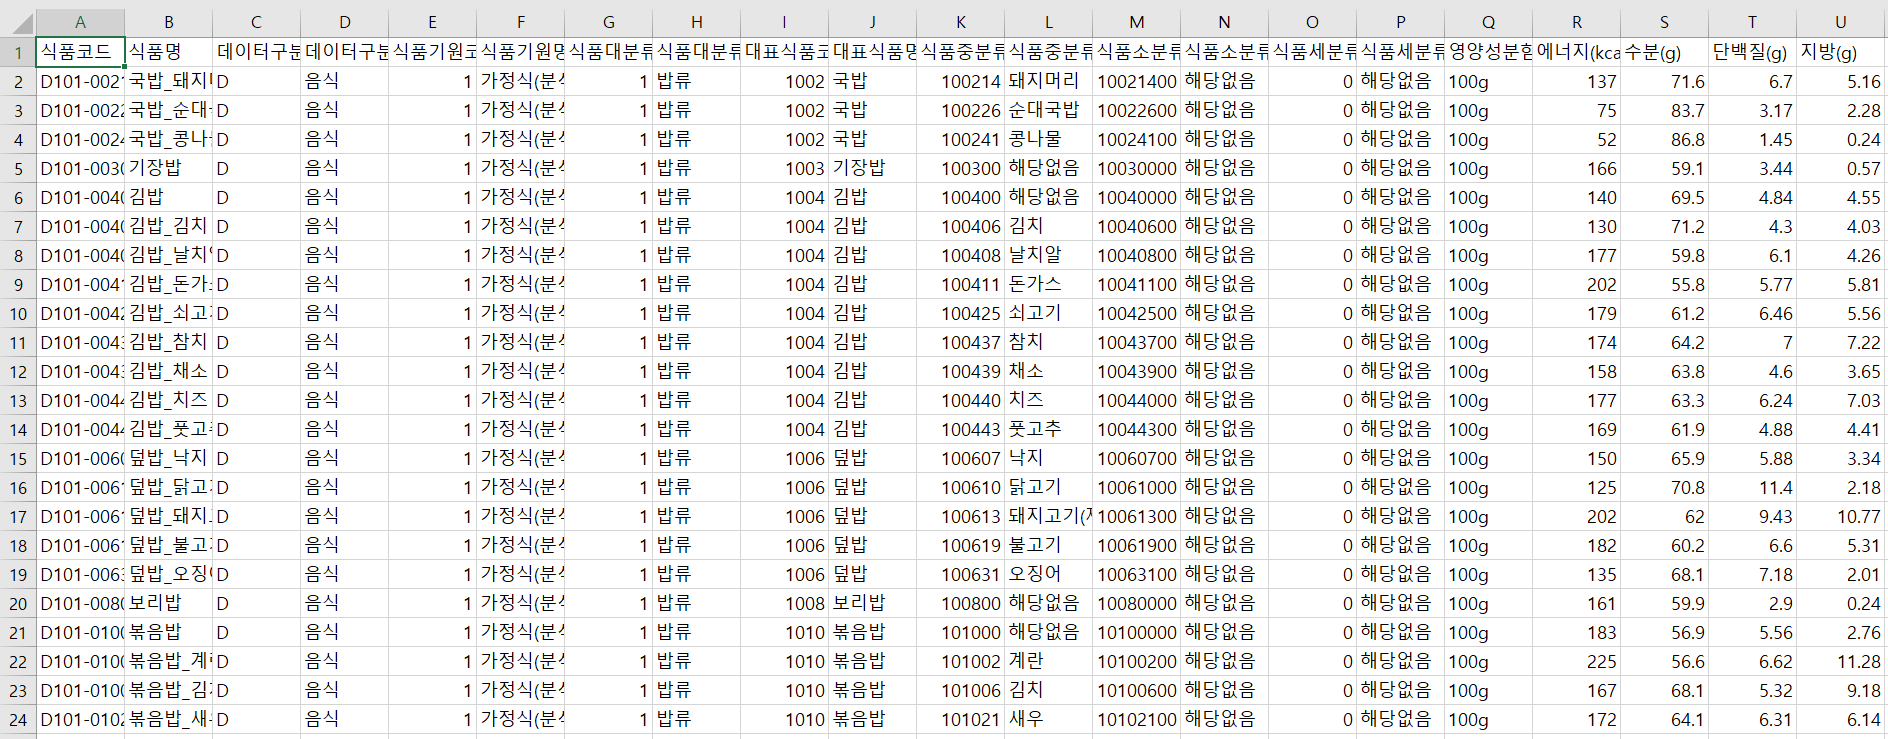

위 url의 정부 공공데이터 사이트에서 csv 형식으로 다운받아 사용하였다.
데이터 분석 라이브러리로는 pandas를 이용하였다. pandas를 프로젝트에서 이용하기 위해 다음 코드로 호출한다.

In [10]:
import pandas as pd

워킹 디렉터리에 저장된 전국통합식품영양성분정보(음식)표준데이터.csv의 파일명이 복잡하므로 파일명을 FoodDB로 변경한 후 변경된 파일명으로 판다스의 read_csv()함수를 이용해 불러왔다.
이때 한글이 깨지는 것을 방지하기 위해 cp949 코드를 추가해준다.

In [11]:
pd.read_csv("C:/Users/leeeun/FoodDB.csv",encoding="cp949")

,식품코드,식품명,데이터구분코드,데이터구분명,식품기원코드,식품기원명,식품대분류코드,식품대분류명,대표식품코드,대표식품명,...,출처코드,출처명,식품중량,업체명,데이터생성방법코드,데이터생성방법명,데이터생성일자,데이터기준일자,제공기관코드,제공기관명
0,D101-002140000-0001,국밥_돼지머리,D,음식,1,가정식(분석 함량),1,밥류,1002,국밥,...,3,식품의약품안전처,900g,해당없음,1,분석,2017-12-31,2022-11-01,1471000,식품의약품안전처
1,D101-002260000-0001,국밥_순대국밥,D,음식,1,가정식(분석 함량),1,밥류,1002,국밥,...,3,식품의약품안전처,900g,해당없음,1,분석,2017-12-31,2022-11-01,1471000,식품의약품안전처
2,D101-002410000-0001,국밥_콩나물,D,음식,1,가정식(분석 함량),1,밥류,1002,국밥,...,3,식품의약품안전처,780g,해당없음,1,분석,2018-12-31,2022-11-01,1471000,식품의약품안전처
3,D101-003000000-0001,기장밥,D,음식,1,가정식(분석 함량),1,밥류,1003,기장밥,...,3,식품의약품안전처,200g,해당없음,1,분석,2017-12-31,2022-11-01,1471000,식품의약품안전처
4,D101-004000000-0001,김밥,D,음식,1,가정식(분석 함량),1,밥류,1004,김밥,...,3,식품의약품안전처,230g,해당없음,1,분석,2018-12-31,2022-11-01,1471000,식품의약품안전처
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,D324-026000000-0001,찹쌀떡,D,음식,3,외식(분석함량),24,"곡류, 서류 제품",24026,찹쌀떡,...,3,식품의약품안전처,100g,해당없음,1,분석,2012-02-28,2022-11-01,1471000,식품의약품안전처
1316,D327-001000000-0001,대구포,D,음식,3,외식(분석함량),27,수·조·어·육류,27001,대구포,...,3,식품의약품안전처,100g,해당없음,1,분석,2014-09-30,2022-11-01,1471000,식품의약품안전처
1317,D327-002000000-0001,물회,D,음식,3,외식(분석함량),27,수·조·어·육류,27002,물회,...,3,식품의약품안전처,700g,해당없음,1,분석,2016-10-31,2022-11-01,1471000,식품의약품안전처
1318,D327-002010000-0001,물회_생선,D,음식,3,외식(분석함량),27,수·조·어·육류,27002,물회,...,3,식품의약품안전처,800g,해당없음,1,분석,2016-10-31,2022-11-01,1471000,식품의약품안전처


## (4) 분석을 위한 데이터의 가공

위와 같은 FoodDB.csv 파일은 데이터 구분 코드, 제공기관 코드 등의 불필요한 정보를 포함하고 있기 때문에 프로젝트를 위해 필요한 정보만 추출해서 수정된 데이터프레임을 csv파일로 저장한다.

정보를 추출할 데이터 프레임의 열은
* 에너지(kcal)
* 탄수화물(g)
* 단백질(g)
* 포화지방산(g)
* 트랜스지방산(g)

이다. 이외에도 다양한 식품 영양성분이 있지만, 그 종류가 너무 방대하기에 모두 포함하면 정보가 지나치게 복잡해진다. 또한 탄단지를 제외한 무기 영양소 등은 일반인들이 잘 모르는 경우가 많고, 미량이 들어있기 때문에 주요 영양성분인 탄수화물, 단백질, 지방만 추출하였다.

이때 정보를 더 효율적으로 시각화하기 위해 데이터프레임의 인덱스를 식품명으로 변경하여 추출한다.

In [13]:
df=pd.read_csv("C:/Users/leeeun/FoodDB.csv",encoding="cp949",index_col="식품명")
moddf=df[['에너지(kcal)','탄수화물(g)','단백질(g)','지방(g)','포화지방산(g)','트랜스지방산(g)']] #칼로리, 탄수화물, 단백질, 지방, 포화지방산, 트랜스지방산만 추출되어 수정된 데이터프레임
moddf.to_csv("new_FoodDB.csv",encoding="cp949") #new_FoodDB라는 이름으로 수정된 데이터프레임을 csv로 저장. cp949코드를 빼면 한글이 깨지므로 추가
moddf
#csv파일 인덱스로 긁어오기

,에너지(kcal),탄수화물(g),단백질(g),지방(g),포화지방산(g),트랜스지방산(g)
식품명,,,,,,
국밥_돼지머리,137,15.94,6.70,5.16,1.47,0.03
국밥_순대국밥,75,10.38,3.17,2.28,1.26,0.01
국밥_콩나물,52,10.93,1.45,0.24,0.12,0.00
기장밥,166,36.77,3.44,0.57,0.08,0.00
김밥,140,19.98,4.84,4.55,1.10,0.02
...,...,...,...,...,...,...
찹쌀떡,277,65.61,3.26,0.15,0.15,0.00
대구포,141,2.33,31.97,0.40,0.17,0.00
물회,76,7.90,4.91,2.70,0.40,0.01


코드를 시행하면 다음과 같이 정상적으로 수정된 데이터 프레임이 추출된다.

<C드라이브 사용자 폴더에 새로운 csv파일 생성된 모습>
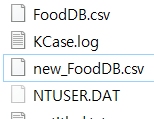

<cp949코드를 포함하지 않았을 경우 한글이 깨지는 모습>
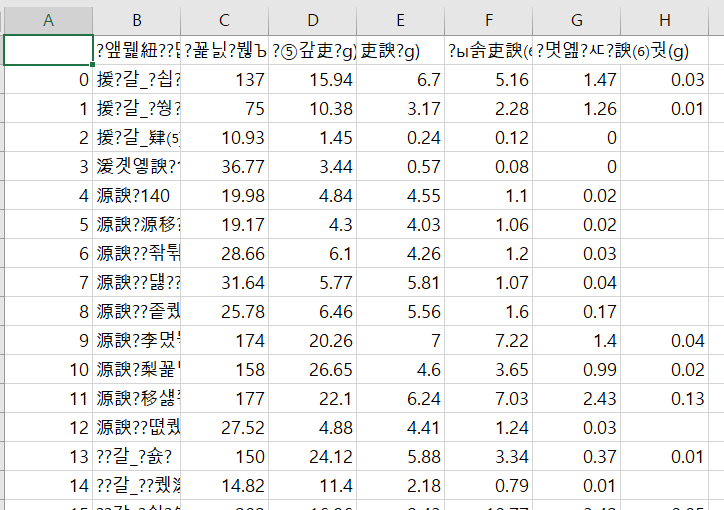

<인덱스 변경, 필요한 정보만 추출한 후 정상적으로 저장된 csv파일(파일명 new_FoodDB)>
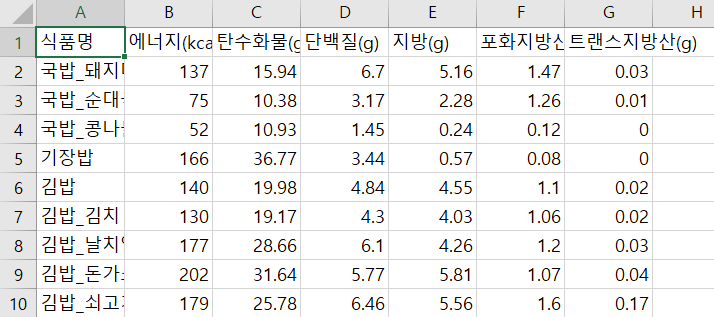

## i. (5) 분석 결과 도출 : 첫번째 기능 (영양성분 비율) 

위와 같이 가공된 파일을 이용해 프로젝트의 첫번째 기능부터 구현하고자 한다.

### 사용자 입력받기
우선 사용자가 하루 동안 섭취한 식품의 영양 성분 비율을 계산하기 위해 사용자로부터 입력 받을 변수는 다음과 같다.

> <사용자로부터 입력 받을 변수>
>* 섭취한 식품명
>* 섭취량(g)

이를 다음 코드로 input() 함수를 통해 사용자로부터 키보드로 입력 받는다.
이때 띄어쓰기를 통해 사용자가 섭취한 여러 식품의 이름을 받고, split() 함수를 이용하여 띄어쓰기 단위로 식품명을 구분하여 리스트의 요소로 넣는다. 이때 사용자가 입력한 식품의 개수는 foodcount 변수에 할당한다.

섭취량도 마찬가지로 키보드를 통해 입력 받은 후 split()으로 구분해준다. 주의할 것은 사용자가 입력한 식품명의 순서와 섭취량의 순서가 대응되어야 한다는 것이다. 이를 프롬프트에 명시해준다.

In [203]:
#사용자 입력을 통해 식품명, 섭취량 받기
foodname=input("섭취한 음식 이름을 띄어쓰기를 통해 입력하세요. ex) 찹쌀떡 김밥 물회 \n:")
N=foodname.split() #식품명 입력값을 띄어쓰기 단위로 구분해서 리스트로
foodcount=len(N) #섭취한 식품 이름의 개수를 세서 foodcount에

foodamount=input("섭취한 음식의 양(g기준)을 띄어쓰기를 통해 식품명의 순서와 일치하게 입력하세요.(g은 생략) \n ex) 123 40 50 \n:")
B=foodamount.split() 

섭취한 음식 이름을 띄어쓰기를 통해 입력하세요. ex) 찹쌀떡 김밥 물회 
:찹쌀떡 김밥 물회 
섭취한 음식의 양(g기준)을 띄어쓰기를 통해 식품명의 순서와 일치하게 입력하세요.(g은 생략) 
 ex) 123 40 50 
:123 40 400


### 사용자 섭취량을 기준으로 한 데이터 프레임 생성

사용자로부터 입력받은 변수를 이용하여 사용자의 하루 식품 섭취량에 따른 총 탄수화물, 지방, 단백질 섭취량을 계산하기 위해 food_dict이라는 이름의 빈 dictonary를 생성한다.
또 FoodDB의 탄단지 함유량은 100g 기준이기 때문에 사용자의 섭취량을 기준으로 탄단지 함유량을 계산하기 위해서 다음과 같은 코드를 설정한다.

사용자가 섭취한 함량을 기준으로 탄수화물, 단백질, 지방 섭취량을 나타내주는 데이터프레임(result_df)를 생성한 후 총 탄수화물, 단백질, 지방 섭취량을 total_성분명 변수에 할당한다.

In [204]:
food_dict = {} 

for i in range(foodcount):
    food_dict[N[i]] = float(B[i])/100

#result_df 사용자가 입력한 식품명에 해당하는 행만 추출한 데이터프레임
result_df = moddf.loc[food_dict.keys(), :]

for key in food_dict:
    result_df.loc[key] *= food_dict[key]

#총 탄단지 섭취량을 각각 변수에 할당
total_car=result_df["탄수화물(g)"].sum()
total_pro=result_df["단백질(g)"].sum()
total_fat=result_df["지방(g)"].sum()
total_full=result_df["포화지방산(g)"].sum()
total_trans=result_df["트랜스지방산(g)"].sum()

result_df

,에너지(kcal),탄수화물(g),단백질(g),지방(g),포화지방산(g),트랜스지방산(g)
식품명,,,,,,
찹쌀떡,340.71,80.7003,4.0098,0.1845,0.1845,0.000
김밥,56.00,7.9920,1.9360,1.8200,0.4400,0.008
물회,304.00,31.6000,19.6400,10.8000,1.6000,0.040


### 원그래프(파이 차트) 그리기: 섭취한 식품의 영양성분 비율 나타내기

새롭게 생성한 result_df를 이용하여, 시각화 라이브러리 matplotlib의 파이 차트를 이용해서 사용자가 입력한 식품의 영양성분 비율을 원 그래프로 시각화하고자 한다.
구성 내용이 사용자가 입력하는 변수로 인해 생성되므로 data와 categories 변수를 설정하여 원 그래프를 구성할 데이터 이름과, 그 이름에 해당되는 데이터를 구분한다.

이때 따로 코드를 설정해주지 않으면 matplotlib에서는 한글로 데이터명을 설정했을 때 폰트가 깨지기 때문에, 따로 코드를 설정하여 한글 폰트 깨짐 현상을 해결한다.

In [217]:
# 한글 폰트 깨짐 현상 해결 코드
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

['NanumGothic']


<function matplotlib.pyplot.show(close=None, block=None)>

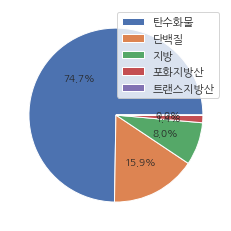

In [206]:
import matplotlib.pyplot as plt

data=[total_car,total_pro,total_fat,total_full,total_trans]
categories=['탄수화물','단백질','지방','포화지방산','트랜스지방산']

plt.pie(data,autopct='%0.1f%%') #사용자가 입력한 식품의 영양성분 비율을 원 그래프로 표현
#문자열 포매팅을 활용해서 해당 항목의 %값을 표시. 소수점 첫 번째 자리까지 보여줌.
plt.legend(categories) #각 항목에 대한 label 달아주기
plt.show

이처럼 **(i) 내가 섭취한 식품의 영양 성분 비율 한 눈에 보기** 기능을 구현하기 위해 설정한 코드들을 하나의 함수 foodratios() 로 정리한다.

섭취한 음식 이름을 띄어쓰기를 통해 입력하세요. ex) 찹쌀떡 김밥 물회 
:찹쌀떡 김밥 물회
섭취한 음식의 양(g기준)을 띄어쓰기를 통해 식품명의 순서대로 입력하세요. (g은 생략) ex) 123 40 50 
:120 40 500


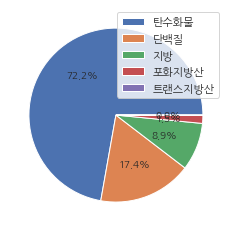

In [207]:
#foodratios(): 식품명, 섭취량을 사용자 입력을 받아 섭취한 식품의 영양성분을 데이터 프레임으로 반환하는 함수를 하나의 함수로 정의

def foodratios():
    
    foodname=input("섭취한 음식 이름을 띄어쓰기를 통해 입력하세요. ex) 찹쌀떡 김밥 물회 \n:")
    N=foodname.split() #식품명 입력값을 띄어쓰기 단위로 구분해서 리스트로
    foodcount=len(N) #섭취한 식품 이름의 개수를 세서 foodcount에

    foodamount=input("섭취한 음식의 양(g기준)을 띄어쓰기를 통해 식품명의 순서대로 입력하세요. (g은 생략) ex) 123 40 50 \n:")
    B=foodamount.split() 
    food_dict = {} 
    for i in range(foodcount):
        food_dict[N[i]] = float(B[i])/100
    result_df = moddf.loc[food_dict.keys(), :] #result_df 식품명에 해당하는 행만 추출
    for key in food_dict:
        result_df.loc[key] *= food_dict[key]

    total_car=result_df["탄수화물(g)"].sum()
    total_pro=result_df["단백질(g)"].sum()
    total_fat=result_df["지방(g)"].sum()
    total_full=result_df["포화지방산(g)"].sum()
    total_trans=result_df["트랜스지방산(g)"].sum()
    
    import matplotlib.pyplot as plt

    data=[total_car,total_pro,total_fat,total_full,total_trans]
    categories=['탄수화물','단백질','지방','포화지방산','트랜스지방산'] #한글 깨짐

    plt.pie(data,autopct='%0.1f%%') #사용자가 입력한 식품의 영양성분 비율을 원 그래프로 표현
    ratiograph=plt.legend(categories) #각 항목에 대한 label 달아주기
    plt.show

    return ratiograph

foodratios()


<정상적으로 출력된 그래프 모습>
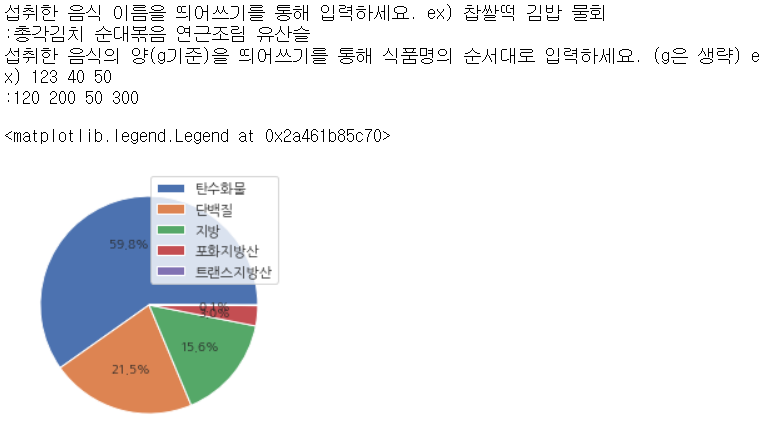


### 적정 영양성분 비율 그래프 생성

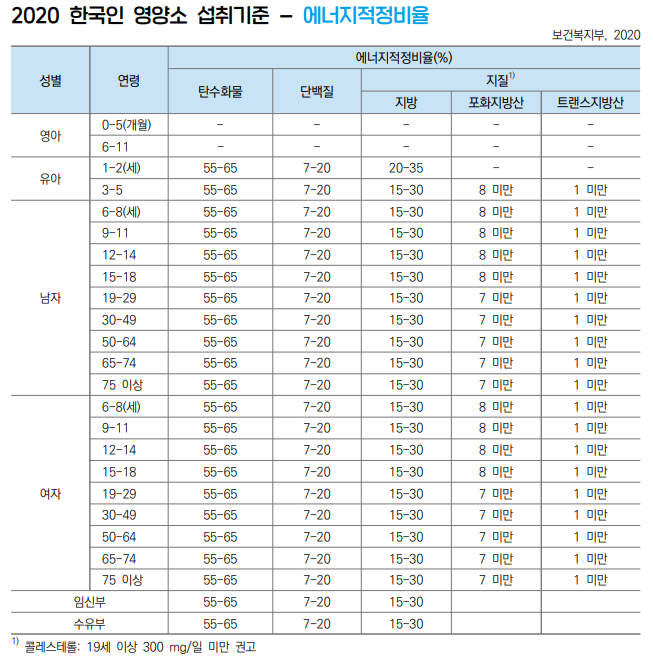
출처) 2020 한국인 영양소 섭취기준 - 보건복지부, 한국영양학회

적정 영양성분 비율은 위의 표를 기준으로 삼아 설정하였다. 범위의 중간값을 가져와 대표값으로 설정하였다.
적정 영양성분 비율과 내가 섭취한 영양 성분의 비율을 시각화하여 비교하기 위해 파이 그래프를 하나 더 생성한 후 사용자의 식품 영양 성분 비율 그래프와 같이 나타내 줄 것이다.

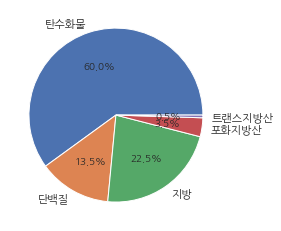

In [224]:
# 적정 영양성분 비율 그래프 생성
ratio=[60, 13.5, 22.5, 3.5, 0.5]
labels=['탄수화물','단백질','지방','포화지방산','트랜스지방산']
plt.pie(ratio,labels=labels,autopct='%.1f%%')
plt.show()

**출력된 그래프 모습**
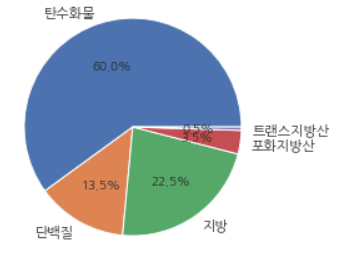

Text(0.5, 1.0, '<적정 영양성분 비율>')

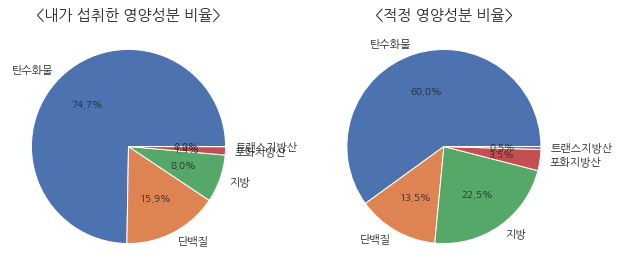

In [239]:
# 두 그래프를 한 번에 그리기

f, axes = plt.subplots(1,2) #그래프 개수
f.set_size_inches((10, 5)) #격자 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3) #여백 설정

axes[0].pie(data,labels=labels,autopct='%0.1f%%')
axes[0].set_title('<내가 섭취한 영양성분 비율>',fontsize=15)
axes[1].pie(ratio,labels=labels,autopct='%.1f%%')
axes[1].set_title('<적정 영양성분 비율>', fontsize = 15)


**정상적으로 출력된 두 개의 그래프**
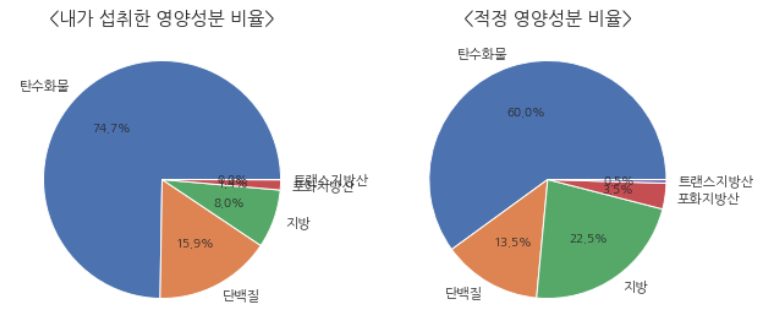

## ii. (5) 분석 결과 도출: 나의 적정 단백질 섭취량 알아보기

#### 단백질 권장 섭취량 계산식

사용자의 단백질 섭취 목적에 따라 필요한 단백질의 양이 다르기 대문에 운동 강도 level을 입력받아 사용자의 단백질 권장 섭취량을 계산할 것이다.
운동 강도가 높아질수록, 많은 단백질을 필요로 할수록 높은 level을 부여한다.
level에 따른 단백질 섭취량 계산식은 다음과 같다.

* level 1: 일반 성인 = 몸무게 1kg당 0.8g
* level 2: 유산소 위주의 운동, 다이어트 목적의 운동 = 몸무게 1kg 당 1.2g (70kg 기준 70×1=70g / 70×1.2=78g) 
* level 3: 강도 높은 근력 운동시 = 몸무게 1kg당 1.5g (70kg 기준 70×1.2=78g / 70×2=140g)
* leve 4: 운동 선수와 같은 고강도 운동, 벌크업 목적=몸무게 1kg당 2g 이상


위 계산식을 활용하기 위해, 사용자로부터 입력 받을 변수는 다음과 같다.

>사용자 입력 변수
>* 식품명 - 위 foodname 그대로 활용
>* 섭취량(g) - 위 코드에서 입력받은 foodamount 활용
>* 몸무게(kg)
>* 운동 강도 level

계산식을 통해 사용자의 단백질 권장 섭취량을 계산하고, 위 (i)를 통해 이미 구해낸 사용자의 실제 단백질 섭취량 총합을 비교하여 그래프로 시각화하여 보여줄 것이다.
또한, 단백질 권장 섭취량을 충족하기 위하여 몇 g의 단백질 섭취가 추가적으로 필요한지를 출력하는 기능도 추가할 것이다.

In [96]:
# 사용자 입력 받기
foodname=input("섭취한 음식 이름을 띄어쓰기를 통해 입력하세요. ex) 찹쌀떡 김밥 물회 \n:")
    
foodamount=input("섭취한 음식의 양(g기준)을 띄어쓰기를 통해 식품명의 순서대로 입력하세요. (g은 생략) ex) 123 40 50 \n:")
    
weight=float(input("당신의 몸무게(kg)를 입력하세요.: "))
    
level=int(input("""당신의 운동 강도 레벨을 숫자로 입력하시오. ex) 1
    level 1: 일반인
    level 2: 유산소 위주, 다이어트 운동
    level 3: 강도 높은 근력 운동
    level 4: 운동선수 수준의 고강도운동 벌크업 목적의 운동
    : """))

섭취한 음식 이름을 띄어쓰기를 통해 입력하세요. ex) 찹쌀떡 김밥 물회 
:찹쌀떡 김밥 물회
섭취한 음식의 양(g기준)을 띄어쓰기를 통해 식품명의 순서대로 입력하세요. (g은 생략) ex) 123 40 50 
:123 40 50
당신의 몸무게(kg)를 입력하세요.: 55
당신의 운동 강도 레벨을 숫자로 입력하시오. ex) 1
    level 1: 일반인
    level 2: 유산소 위주, 다이어트 운동
    level 3: 강도 높은 근력 운동
    level 4: 운동선수 수준의 고강도운동 벌크업 목적의 운동
    : 1


사용자에게 키보드로 변수들을 입력받은 후, 아래 코드를 통해 사용자의 적정 단백질 섭취량을 위에 제시한 계산식을 통해 계산하는 함수 calprotein()을 정의하고, 사용자가 적절한 단백질양을 섭취했는지 알아보고 그렇지 않을 경우 적절한 단백질 함량을 섭취하도록 안내해주는 함수 lackprotein()을 정의한다.

In [180]:
total_pro=result_df["단백질(g)"].sum() #사용자가 입력한 식품의 총 단백질 함량

#사용자의 적정 단백질 섭취량 계산 함수
def calprotein(level):
    global proper_pro #적정 단백질 섭취량 변수
    
    if level==1:
        proper_pro=weight*0.8
    elif level==2:
        proper_pro=weight*1.2
    elif level==3:
        proper_pro=weight*1.5
    elif level==4:
        proper_pro=weight*2
    else:
        print("0~4의 범위 내로 다시 입력해주세요.")
        
    return proper_pro

#부족한 단백질 섭취량 계산해주는 함수
def lackprotein():
    lack=total_pro-proper_pro
    abs_lack=abs(lack)
    global string
    if lack<0:
        string="단백질 부족! 부족한 단백질 함량은 %f(g)입니다."%abs_lack
    elif lack==0:
        string="단백질 함량을 딱 알맞게 섭취하셨어요!"
    else:
        string="단백질 과잉! 적절한 단백질 함량은 %f(g)입니다."%proper_pro
        
    return string

#함수 실행
calprotein(level) #level에 따라 사용자의 적정 단백질 섭취량 계산
print(proper_pro)
lackprotein() #부족한 단백질 섭취량 계산

44.0


'단백질 부족! 부족한 단백질 함량은 36.044800(g)입니다.'

### 막대 그래프(바차트) 그리기:  나의 적정 단백질 섭취량 알아보기

matplotlib 라이브러리를 이용하여 사용자의 적정 단백질 섭취량 사용자가 실제로 섭취한 단백질 함량을 비교해주는 그래프를 막대 그래프를 이용해 나타낸다. <br>
이때 그래프의 막대를 통해 비교하는 것 뿐만 아니라, 사용자가 부족한 단백질 함량 혹은 적절한 단백질 함량을 따로 안내받을 수 있는 텍스트 박스를 추가하여 그래프를 나타낸다.

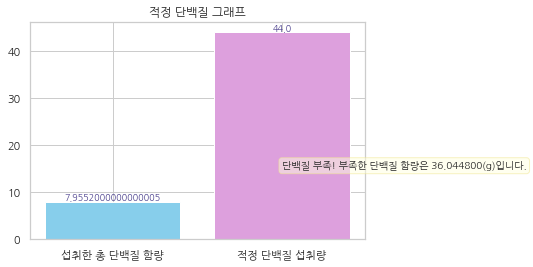

In [193]:
#바 그래프로 나타내기
import matplotlib.pyplot as plt
import numpy as np

plt.title('적정 단백질 그래프')
xlabel=['섭취한 총 단백질 함량','적정 단백질 섭취량'] #x축 각각의 label
values=[total_pro, proper_pro]

X=np.arange(len(values))
plt.bar(X, values, color=['skyblue','plum'],tick_label=xlabel) #색 지정

#그래프 위에 정확한 함량을 숫자로 적어주기
for i, v in enumerate(X):
    plt.text(v, values[i], values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='darkslateblue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    
#부족한 단백질 섭취량을 보여주는 텍스트를 박스로 추가하기
mybox={'facecolor':'lightyellow','edgecolor':'khaki','boxstyle':'round','alpha':0.5}
plt.text(1,15,string,bbox=mybox)
plt.show()

**<정상적으로 출력된 그래프의 모습>**
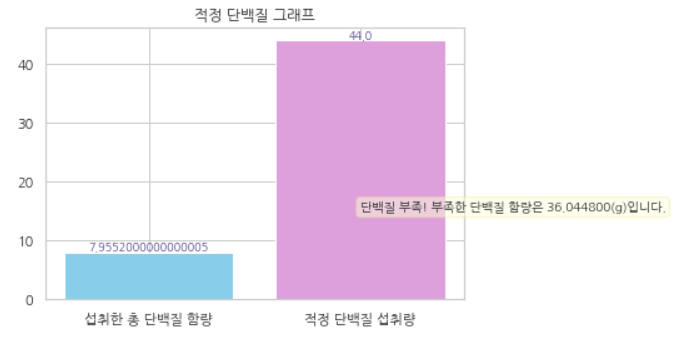

## (6) 결론:

프로젝트를 통해 기획했던 기능들이 오류 없이 무사히 수행되었다. 이번 프로젝트를 통해 의도했던 대로 식단 관리를 하는 사용자들에게 편리한 기능을 제공할 수 있을 것으로 생각된다. 실제로 사람들이 기능을 사용할 수 있도록 배포되려면 앱이나 웹을 통해 접근할 수 있도록 구현을 해야겠지만, 그동안 배운 파이썬을 통해 의도대로 기능을 구현해본 것에 보람을 느꼈다.<br>

프로젝트를 하면서 난관에 부딪혔던 것은 우선 값이 정해져 있는 정적인 데이터가 아닌, 사용자로부터 입력받는 동적인 데이터를 이용해서 시각화를 해야 했기 때문에 코드를 어떻게 짤 것이냐하는 것이었다. 다양한 방법이 있었지만 이를 어떻게 효율적으로 짤 것인지가 가장 큰 문제였던 것 같다.처음에는 for문과 range 함수를 이용해서 일일이 집어넣는 방식으로 데이터 프레임을 생성한 후, 사용자가 입력한 탄단지 양도 따로따로 받았는데, 스스로도 비효율적인 방식이라는 생각이 들어서 조교님께 질문을 드리니 dictonary를 이용해 데이터프레임을 생성하는 방식을 말씀해주셔서 그 방식으로 코드를 짤 수 있었다.<br>
같은 결과에 접근하는데 코드의 효율성이 확 달라지는 것을 보고, 단순히 코드를 읽을 줄 아는 것과 아는 함수와 기능들을 조합하여 코드를 짜내는 것은 엄청난 차이가 있다는 생각이 들었다. 그 수준에 올라갈 수 있도록 더욱 노력해야겠다는 생각이 함께 들었다.<br>
또 이번 프로젝트를 통해 변수들이 너무 많아져서, 변수를 다시 꺼내야 될 때 변수명이 매우 헷갈렸다. 그래서 변수명이 헷갈리지 않도록 그 변수의 내용을 담아 변수명을 정확하게 설정하는 것의 중요성을 느꼈다. 또 몇 줄의 간단한 코드일지라도 다양한 이유로 오류가 많이 발생했고, 구현하고 싶은 기능에 해당하는 적절한 그래프를 설정하는 것 등 여러 어려움이 있었지만 결과적으로 원하던 기능을 하나의 프로젝트에 구현에 낸 것에 의의를 두고 싶다.

이번 프로젝트에서 나아가 개선하고 싶은 점들은, 나의 프로젝트 같은 경우에는 식품명이 FoodDB.csv의 식품명과 일치가 되게 입력을 해야하고 이에 벗어나는 식품명을 입력할 수 없다. 예를 들어 돼지고기 국밥이라고 통상적으로 부르는 음식 이름이 아닌 인덱스와 일치하도록 국밥_돼지고기와 같은 식으로 입력을 해야한다. 이러한 부분을 일반적인 식품명을 입력했을 때에도 정상적으로 출력되도록 수정을 하고 싶다. 또 더 다양한 식품을 입력받도록 (가공식품, 기능성 식품 등) 데이터 범위를 넓혀 프로그램을 구현해보고 싶다. <br>
또한, 기능을 추가하게 된다면 섭취한 열량에 따라 적정 섭취 열량인지를 알려주고, 그동안 사용자가 입력한 식품 열량 데이터를 통해 사용자의 미래 비만, 마름 확률 등을 수치화해서 알려주는 기능을 추가해보고 싶다.<br>
이러한 개선점들을 생각하여 이번 방학 때 html/css/자바스크립트를 배워 웹페이지를 생성하여 기능들을 구현해볼 생각이다.

## (7) 참고문헌:


* 도서 <br>
Do it! 쉽게 배우는 파이썬 데이터 분석 - 김영우 <br>
Matplotlib Tutorial 파이썬으로 데이터 시각화하기 - Dardao <br>
[Python 완전정복 시리즈] 2편: Pandas DataFrame 완전정복 - 김태준


* 웹사이트 <br>
Python에서 데이터 시각화하는 다양한 방법  <br>
https://zzsza.github.io/development/2018/08/24/data-visualization-in-python/ <br>
데이터 시각화를 위한 라이브러리 - 맷플랏립  <br>
https://brunch.co.kr/@parkkyunga/58 <br>
판다스(pandas) 기본 사용법 익히기  <br>
https://dandyrilla.github.io/2017-08-12/pandas-10min/ <br>
[판다스, pandas] dataframe 특정 조건에 맞는 데이터 추출 <br>
https://computer-science-student.tistory.com/375
matplotlib 파이차트 그리기 <br>
https://hleecaster.com/python-matplotlib-pie-chart/ <br>
[Python]다중 조건으로 데이터 프레임 특정 행 추출하기(데이터 프레임 필터링) <br>
https://csshark.tistory.com/63 <br>
python 동적 변수 (자동 변수) 생성 <br>
https://velog.io/@paori/python-%EB%8F%99%EC%A0%81-%EB%B3%80%EC%88%98-%EC%9E%90%EB%8F%99-%EB%B3%80%EC%88%98-%EC%83%9D%EC%84%B1 <br>
[파이썬 matplotlib] 그래프 텍스트에 박스 추가하기 <br>
https://pyvisuall.tistory.com/53 <br>
color example code: named_colors.py <br>
https://matplotlib.org/2.0.2/examples/color/named_colors.html <br>
matplotlib/seaborn으로 시각화할 때 한글 폰트 깨짐현상 해결방법 <br>
https://teddylee777.github.io/visualization/matplotlib-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%EC%A0%81%EC%9A%A9 <br>


* 문서<br>
2020 한국인 영양소 섭취기준 - 보건복지부, 한국영양학회

## (8) 별첨 : (3)의 데이터 원본 
파일명: FoodDB.csv

## (9) 별첨 : (4)의 가공된 데이터 원본
파일명: new_foodDB.csv
데이터 원본의 경우, 프로젝트를 제출할 때 폴더에 같이 첨부하였다.

## (10) (3)-> (4)를 위해 본인이 직접 개발한 소스코드 원본
번호 중간 중간 직접 입력한 소스코드를 같이 첨부하였다.